<a href="https://colab.research.google.com/github/nurdinihayati07-cloud/Sentiment-Analysis/blob/main/PE22006_LR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***LAB REPORT 4***

***PE22006***

**QUESTION 2**

Start your coding by importing all the relevant libraries and datasets into a pandas data frame.

**IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**QUESTION 1**

Choose any real-world datasets involving sentiment analysis. Datasets can be obtained from anywhere, such as Kaggle, the UCI repository, and others. Your dataset MUST BE DIFFERENT from others.

**IMPORT DATASET**

Explaination: Extract dataset of Google review from Mufasa: The Lion King using Apify. This dataset has 2 columns and 1075 rows.

In [ ]:
# Replace 'your_file.csv' with the actual file name
df = pd.read_csv('MOVIE MUFASA REVIEW.csv')

# Print some info to check if import was succesful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FmcO7b  1075 non-null   object
 1   T7nuU   271 non-null    object
dtypes: object(2)
memory usage: 16.9+ KB


In [ ]:
# Rename columns
df = df.rename(columns={'FmcO7b': 'Name', 'T7nuU': 'review'})

In [ ]:
df.head()

,Name,review
0,Pavol Fabian Bača,",,So whenever you feel alone, just remember th..."
1,R King,"I have to admit, I was initially skeptical abo..."
2,Arshman Shah,"A Majestic Return to the Pride Lands: ""Mufasa:..."
3,Kyle Vansteelandt,"4/4 ""Mufasa"" tells the origin story about how ..."
4,Jackie TheCartoonfan,I absolutely LOVE this movie!! I don’t feel re...


**QUESTION 3**

Show all the text pre-processing involved using the NLP toolkit in Python.

# **DATA PREPROCESSING**

**1. Select Features**

In [ ]:
text_df = df.drop(['Name'],axis=1)
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  271 non-null    object
dtypes: object(1)
memory usage: 8.5+ KB


**2. Handle missing value and Duplicated data**

In [ ]:
#check missing value
text_df.isnull().sum()

,0
review,804


Explaination: There are 804 missing value in this dataset.

In [ ]:
#drop missing value
text_df= text_df.dropna()
text_df.isnull().sum()

,0
review,0


In [ ]:
#check duplicate data
text_df.duplicated().sum()

2

Explaination: There are 2 duplicated data in this dataset.

In [ ]:
#drop dulplicate data
text_df = text_df.drop_duplicates()
text_df.duplicated().sum()

0

**3. Import Library for text preprocessing**

In [ ]:
#IMPORT LIBRARY FOR DATA PREPROCESSING sentiment
import nltk
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install deep_translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00


3.1 Using deep translate if the review have other than English language

In [ ]:
# code translate text_df using deep traslator

import pandas as pd
from deep_translator import GoogleTranslator

# Assuming text_df is already defined and contains a 'Text' column

translator = GoogleTranslator(source='auto', target='en')

def translate_to_english(text):
    try:
        translated = translator.translate(text)
        return translated
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

text_df['review'] = text_df['review'].apply(translate_to_english)

3.2 Remove noise data like punctuation and grammar word

In [ ]:
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Download 'punkt' and 'stopwords' if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

def data_processing(Text):
    stop_words = set(stopwords.words('english'))

    if not isinstance(Text, str):
        text = str(text)

    Text = Text.lower()
    Text = re.sub(r"https\S+https\S+", '', Text, flags=re.MULTILINE)
    Text = re.sub(r'\@w+|\#','', Text)
    Text = re.sub(r'[^\w\s]','',Text)
    Text_tokens = word_tokenize(Text)
    filtered_Text = [w for w in Text_tokens if not w in stop_words]
    return " ".join(filtered_Text)

text_df['review'] = text_df['review'].apply(data_processing)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer

LEXICON APPROACH USING TEXT BLOB: TextBlob provides a quick sentiment polarity score (-1 to 1)

In [ ]:
def stemming(text_df):
    Text = [stemmer.stem(word) for word in df]
    return df

In [ ]:
def polarity(Text):
  return TextBlob(Text).sentiment.polarity

Explanation: PorterStemmer is a tool from the nltk library used for stemming to reduce word become the root word.

In [ ]:
text_df['polarity'] = text_df['review'].apply(polarity)

In [ ]:
text_df.head(10)

,review,polarity
0,whenever feel alone remember kings always guid...,0.562500
1,admit initially skeptical mufasa lion king esp...,0.042857
2,majestic return pride lands mufasa lion king s...,0.342708
3,44 mufasa tells origin story titular protagoni...,0.285714
4,absolutely love movie dont feel regret actuall...,-0.001190
5,mufasa lion king light hearted relaxing experi...,0.026563
6,close close greatest live action adaptation ti...,0.307197
7,visually incredible opening scene youre immers...,0.600000
8,mufasa fantastic movie start amazed beautiful ...,0.405476
9,mufasa lion king nothing short cinematic maste...,0.350000


In [ ]:
# Label the sentiment
def sentiment (label):
  if label < 0:
    return "Negative"
  elif label == 0:
    return "Neutral"
  elif label > 0:
    return "Positive"

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [ ]:
text_df.tail(5)

,review,polarity,sentiment
597,movie watchable drag music lyrics complete let...,-0.060185,Negative
600,movie doesnt live name would rate average watc...,-0.023967,Negative
620,feel like disney spit face masterpiece origina...,0.340000,Positive
651,yeah movie ok dont know say disappointed stuff...,0.068056,Positive
976,think okay ever parts felt bit overwhelmed wal...,0.020833,Positive


<Axes: xlabel='sentiment', ylabel='count'>

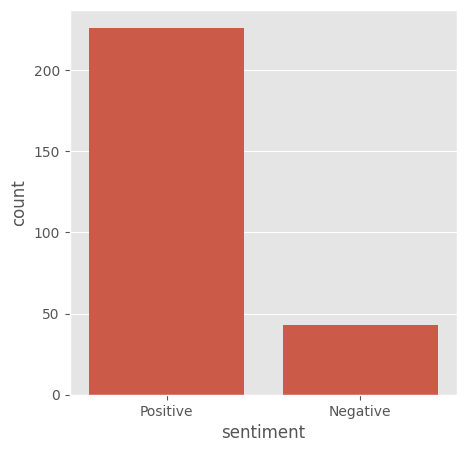

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment',data=text_df)

In [ ]:
# total count of all sentiments:
Sentiment_counts = text_df['sentiment'].value_counts()
print(Sentiment_counts)

sentiment
Positive    226
Negative     43
Name: count, dtype: int64


Explanation: Its show 226 positive sentiment from the movei review and 43 negative reviews.

In [ ]:
total_sentiment_score = text_df['polarity'].sum()
print("Total Sentiment Score:", total_sentiment_score)

Total Sentiment Score: 50.35113246289929


Explaintation: The total sentiment score is positive (50.35), suggesting an overall positive sentiment expressed for MUFASA: The Lion King Movie reviews.

**VISUALIZATION OF SENTIMENT ANALYSIS**

In [ ]:
# Import Library for visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
#Define
neg_reviews = text_df[text_df.sentiment == 'Negative']
pos_reviews = text_df[text_df.sentiment == 'Positive']

***Positive Reviews***

In [ ]:
P_Text = ''.join([word for word in pos_reviews['review']])

#
wordcloud_pos = WordCloud(
    max_words=150,  # Maximum number of words to include
    width=8000,  # Width of the word cloud image
    height=5000,  # Height of the word cloud image
    background_color='darkgrey',  # Background color
    colormap='hot'
).generate(P_Text)

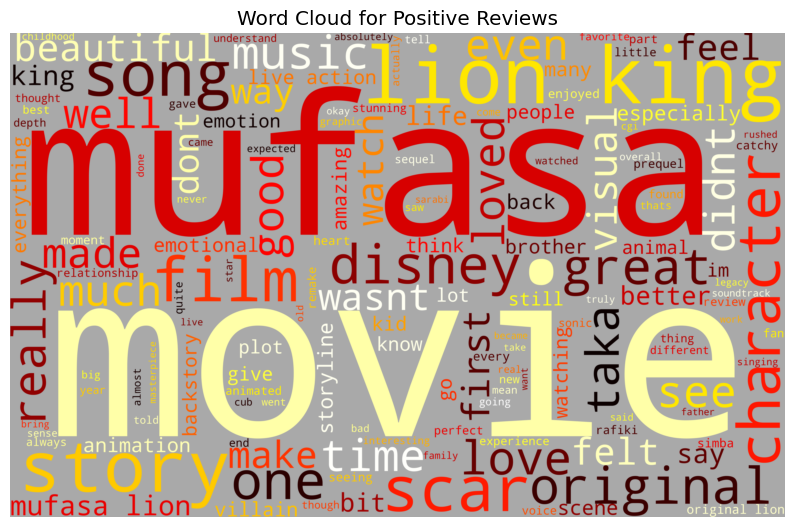

In [ ]:
plt.figure(figsize=(10, 10))  # Set the figure size
plt.imshow(wordcloud_pos, interpolation='bilinear')  # Display the word cloud
plt.axis('off')  # Hide the axis
plt.title('Word Cloud for Positive Reviews')  # Set the title
plt.show()  # Show the plot

Explantion: This word cloud represents the words that appear most frequently in positive reviews. The words "Mufasa", "movie", "story", and "film" are the most prominent. This shows that the positive reviews are very focused on the character of Mufasa who is the main character of the movie MUFASA: The Lion King and the storyline that captivates the audience. Words like "beautiful", "amazing", "great", "love", "good" and "emotional" show that the audience felt the emotional depth, visuals and quality of the movie. Other important characters including "Scar", "King" and "Taka" also stand out showing that the characters are important to complete this narrative.

In [ ]:
# Calculate the number of words in each review
text_df['nb_words'] = text_df['review'].apply(lambda x: len(str(x).split()))

# Filter for positive reviews with more than 5 words and then sort and select
positive_reviews = text_df[(text_df["sentiment"] == "Positive") & (text_df["nb_words"] >= 5)]
positive_reviews = positive_reviews.sort_values("polarity", ascending=False)[["review", "polarity"]].head(10)

# Display the results
print(positive_reviews)

                                                review  polarity
11   mufasa lion king rating 455 beautiful tale aug...  0.625000
70   movie everything could ever wanted wished much...  0.620000
140  scared movie would ruin character mufasa fear ...  0.610000
7    visually incredible opening scene youre immers...  0.600000
49   favorite movie song chef kiss everything movie...  0.571429
0    whenever feel alone remember kings always guid...  0.562500
129  origin story forever king mufasa masterpiece i...  0.552778
131  great watched walt disney film mufasa lion kin...  0.535714
25   really loved bittersweet circle life moment se...  0.515625
347  visuals mufasa lion king truly breathtaking br...  0.500000


***Negative Review***

In [ ]:
N_Text = ''.join([word for word in neg_reviews['review']])

In [ ]:
wordcloud_neg = WordCloud(
    max_words=150,  # Maximum number of words to include
    width=8000,  # Width of the word cloud image
    height=5000,  # Height of the word cloud image
    background_color='black',  # Background color
    colormap='Pastel1'  # Use a pastel colormap for contrasting light text colors
).generate(N_Text)

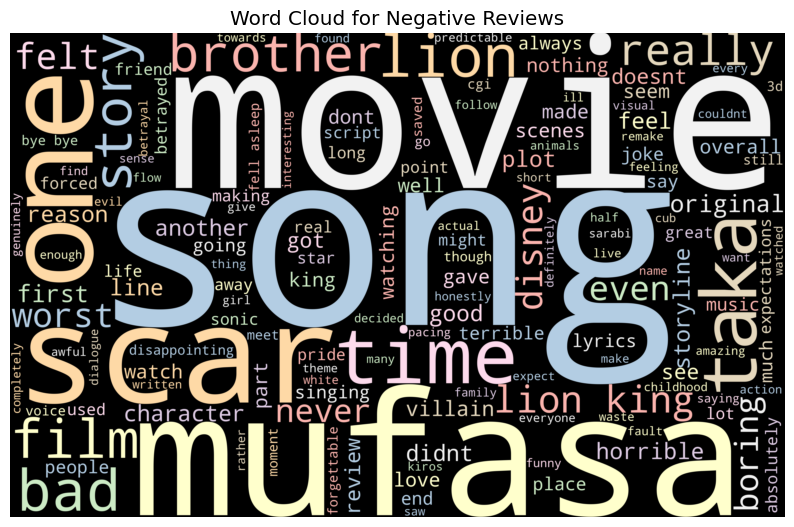

In [ ]:
plt.figure(figsize=(10, 10))  # Set the figure size
plt.imshow(wordcloud_neg, interpolation='bilinear')  # Display the word cloud
plt.axis('off')  # Hide the axis
plt.title('Word Cloud for Negative Reviews')  # Set the title
plt.show()  # Show the plot

In [ ]:
# Calculate the number of words in each review
text_df['nb_words'] = text_df['review'].apply(lambda x: len(str(x).split()))

# Filter for positive reviews with more than 5 words and then sort and select
negative_reviews = text_df[(text_df["sentiment"] == "Negative") & (text_df["nb_words"] >= 5)]
negative_reviews = negative_reviews.sort_values("polarity", ascending=False)[["review", "polarity"]].head(10)

# Display the results
print(negative_reviews)

                                                review      polarity
223  firstly didnt expect kind betrayal disney degr... -1.586033e-17
4    absolutely love movie dont feel regret actuall... -1.190476e-03
199  visuals pretty amazing story line could use im... -4.166667e-03
414  movie perfect shocked found mufasa bad one tak... -4.761905e-03
184  really appreciate story mufasa ill still go sc... -1.107143e-02
136  saw movie soon dropped cinema love big cats go... -2.017906e-02
600  movie doesnt live name would rate average watc... -2.396694e-02
97   spoilers making realistic lion king movie addi... -2.619048e-02
61   mufasa orphaned cub meets taka lion heir kingd... -2.962963e-02
359  scar literally reason villain reason king didn... -3.333333e-02


Explanation: This word cloud represents the words that appear most frequently in negative reviews. Words like "movie", "song", "Mufasa" and "Scar" appear prominently, indicating that these aspects are the focus of criticism from some viewers. Perhaps they were less than satisfied with the way the characters were presented or the storyline. Words like "bad", "worst", "terrible", "boring" and "horrible" indicate strong dissatisfaction with certain elements of the film. Words like "felt", "disappointing" and "betrayed" indicate that some negative reviews stem from emotional disappointment or unfulfilled expectations, perhaps tied to nostalgia for the original.

**QUESTION 4**

Develop your machine learning models using at least 3 supervised learning methods and evaluate them based on the metrics you learn in Chapter 4.

***MODEL: K-NN, Decision Tree Classifier and Logistic Regression***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

In [ ]:
def sentiment_classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)

    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

    knn=KNeighborsClassifier()
    dt=DecisionTreeClassifier()
    lr=LogisticRegression(max_iter=100)


    algos=[knn,dt,lr]
    algo_names=['KNeighborsClassifier','DecisionTreeClassifier','LogisticRegression']

    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]

    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        # Set pos_label to 'Positive' for precision, recall, and f1-score
        precision_scored.append(precision_score(y_test,item.predict(x_test), pos_label='Positive'))
        recall_scored.append(recall_score(y_test,item.predict(x_test), pos_label='Positive'))
        f1_scored.append(f1_score(y_test,item.predict(x_test), pos_label='Positive'))

    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    sentiment_classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

Evaluate models using **Performance Measure**

In [ ]:
# Evaluate models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(text_df['review'])
y = text_df['sentiment']

result = sentiment_classification_funct(x,y)
result

(215, 3073) (54, 3073) (215,) (54,)


,f1_score,recall_score,precision_score,accuracy_score
KNeighborsClassifier,0.905263,0.977273,0.843137,0.833333
DecisionTreeClassifier,0.898876,0.909091,0.888889,0.833333
LogisticRegression,0.897959,1.000000,0.814815,0.814815


Explaination: The dataset comprises a training set of 215 samples with 3073 features and a testing set of 54 samples.  
KNeighborsClassifier demonstrates the best overall performance with the highest F1-score (0.905), indicating a strong balance between precision and recall. The recall shows an excellent value which is 0.977 (97%), meaning it identifies true positives effectively, although its precision is slightly lower  0.843 (84%), suggesting the presence of some false positives. The accuracy of the KNN model is 0.833 (833%), matching that of the DecisionTreeClassifier. This makes KNN a reliable choice for balanced performance.

The DecisionTreeClassifier achieves an F1-score of 0.899 (89%), slightly lower than KNN, but offers a better output value in precision 0.889 (88%) and recall is 0.909 (90%). While its recall is slightly lower than KNN’s, its higher precision indicates fewer false positives. It also achieves an accuracy of 0.833 (83%).

The LogisticRegression model shows excellent results in recall with a perfect score of 1.000 (100%), ensuring that no true positives are missed. However, this comes at the expense of precision, which is the lowest among the three models with 0.815 (81%), indicating a higher rate of false positives. Its F1-score 0.898 (89%) and accuracy 0.815 (81%) are also the lowest among other models.

**QUESTION 5**

Finally, conclude your findings at the end of your report.

My findings from the models is that among the models, the KNeighborsClassifier demonstrates the best overall performance with the highest F1-score 0.905, indicating a strong balance between precision and recall. Its recall 0.977 is excellent, meaning it identifies true positives effectively. But its precision 0.843 is slightly lower, suggesting the presence of some false positives. The accuracy of the KNN model is 0.833, matching that of the DecisionTreeClassifier. This makes KNN a reliable choice for balanced performance.

My findings from the overall sentiment analysis of MUFASA: The Lion King reveal a mixed response from the audience, with both positive and negative perspectives appearing prominently. As we can see from the bar chart shown, the majority of the overall audience reviews from google reviews are positive and only a small number are negative. This may be due to different movie tastes or the film not reaching the imagination of some viewers. This is mentioned in my findings because if we notice there are some keywords that are the same in the cloud of positive reviews and also negative reviews such as the character names Mufasa and Scar. In addition, there are also negative words such as 'betrayed' but it is actually the audience telling the story of the film not with the intention of giving negative comments about the film. This shows the weakness of Sentiment Analysis using only machines, because it cannot read the entire comment accurately such as funny and sarcastic comments.
